In [85]:
# Display all cell outputs
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')


import plotly
# Authenticate with your account
plotly.tools.set_credentials_file(username='####',api_key='###')

import plotly.plotly as py
import plotly.graph_objs as go

# Offline mode
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [4]:
from bnb.data_processing.read import read_csvfile
from bnb.data_analysis.analyze import group_by_date

## Reading Data

In [5]:
Data_dir = Path('C:/Users/KBrig/AirBnBRepo/AirBnB/data')
Data_dir

WindowsPath('C:/Users/KBrig/AirBnBRepo/AirBnB/data')

In [6]:
NewYork_CSV = Data_dir/'NewYorkData_clean.csv'
Bangkok_CSV = Data_dir/'BangkokData_clean.csv'
Cairo_CSV = Data_dir/'CairoData_clean.csv'


### NewYork

In [29]:
NewYorkData = read_csvfile(NewYork_CSV)
NewYorkData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Columns: 107 entries, Price to sofa
dtypes: float64(11), int64(94), object(2)
memory usage: 3.2+ MB


### Bangkok

In [22]:
BangkokData = read_csvfile(Bangkok_CSV)
BangkokData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7751 entries, 0 to 7750
Columns: 105 entries, Price to sofa
dtypes: float64(12), int64(91), object(2)
memory usage: 6.2+ MB


### Cairo

In [35]:
CairoData = read_csvfile(Cairo_CSV)
CairoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7902 entries, 0 to 7901
Columns: 106 entries, Price to sofa
dtypes: float64(11), int64(93), object(2)
memory usage: 6.4+ MB


## Numeric Data Analysis

### NewYork

In [61]:
list(set(NewYorkData.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [64]:
NewYorkData_num = NewYorkData.select_dtypes(include = ['float64', 'int64'])

Let's check the distribution of all numeric features we have! 

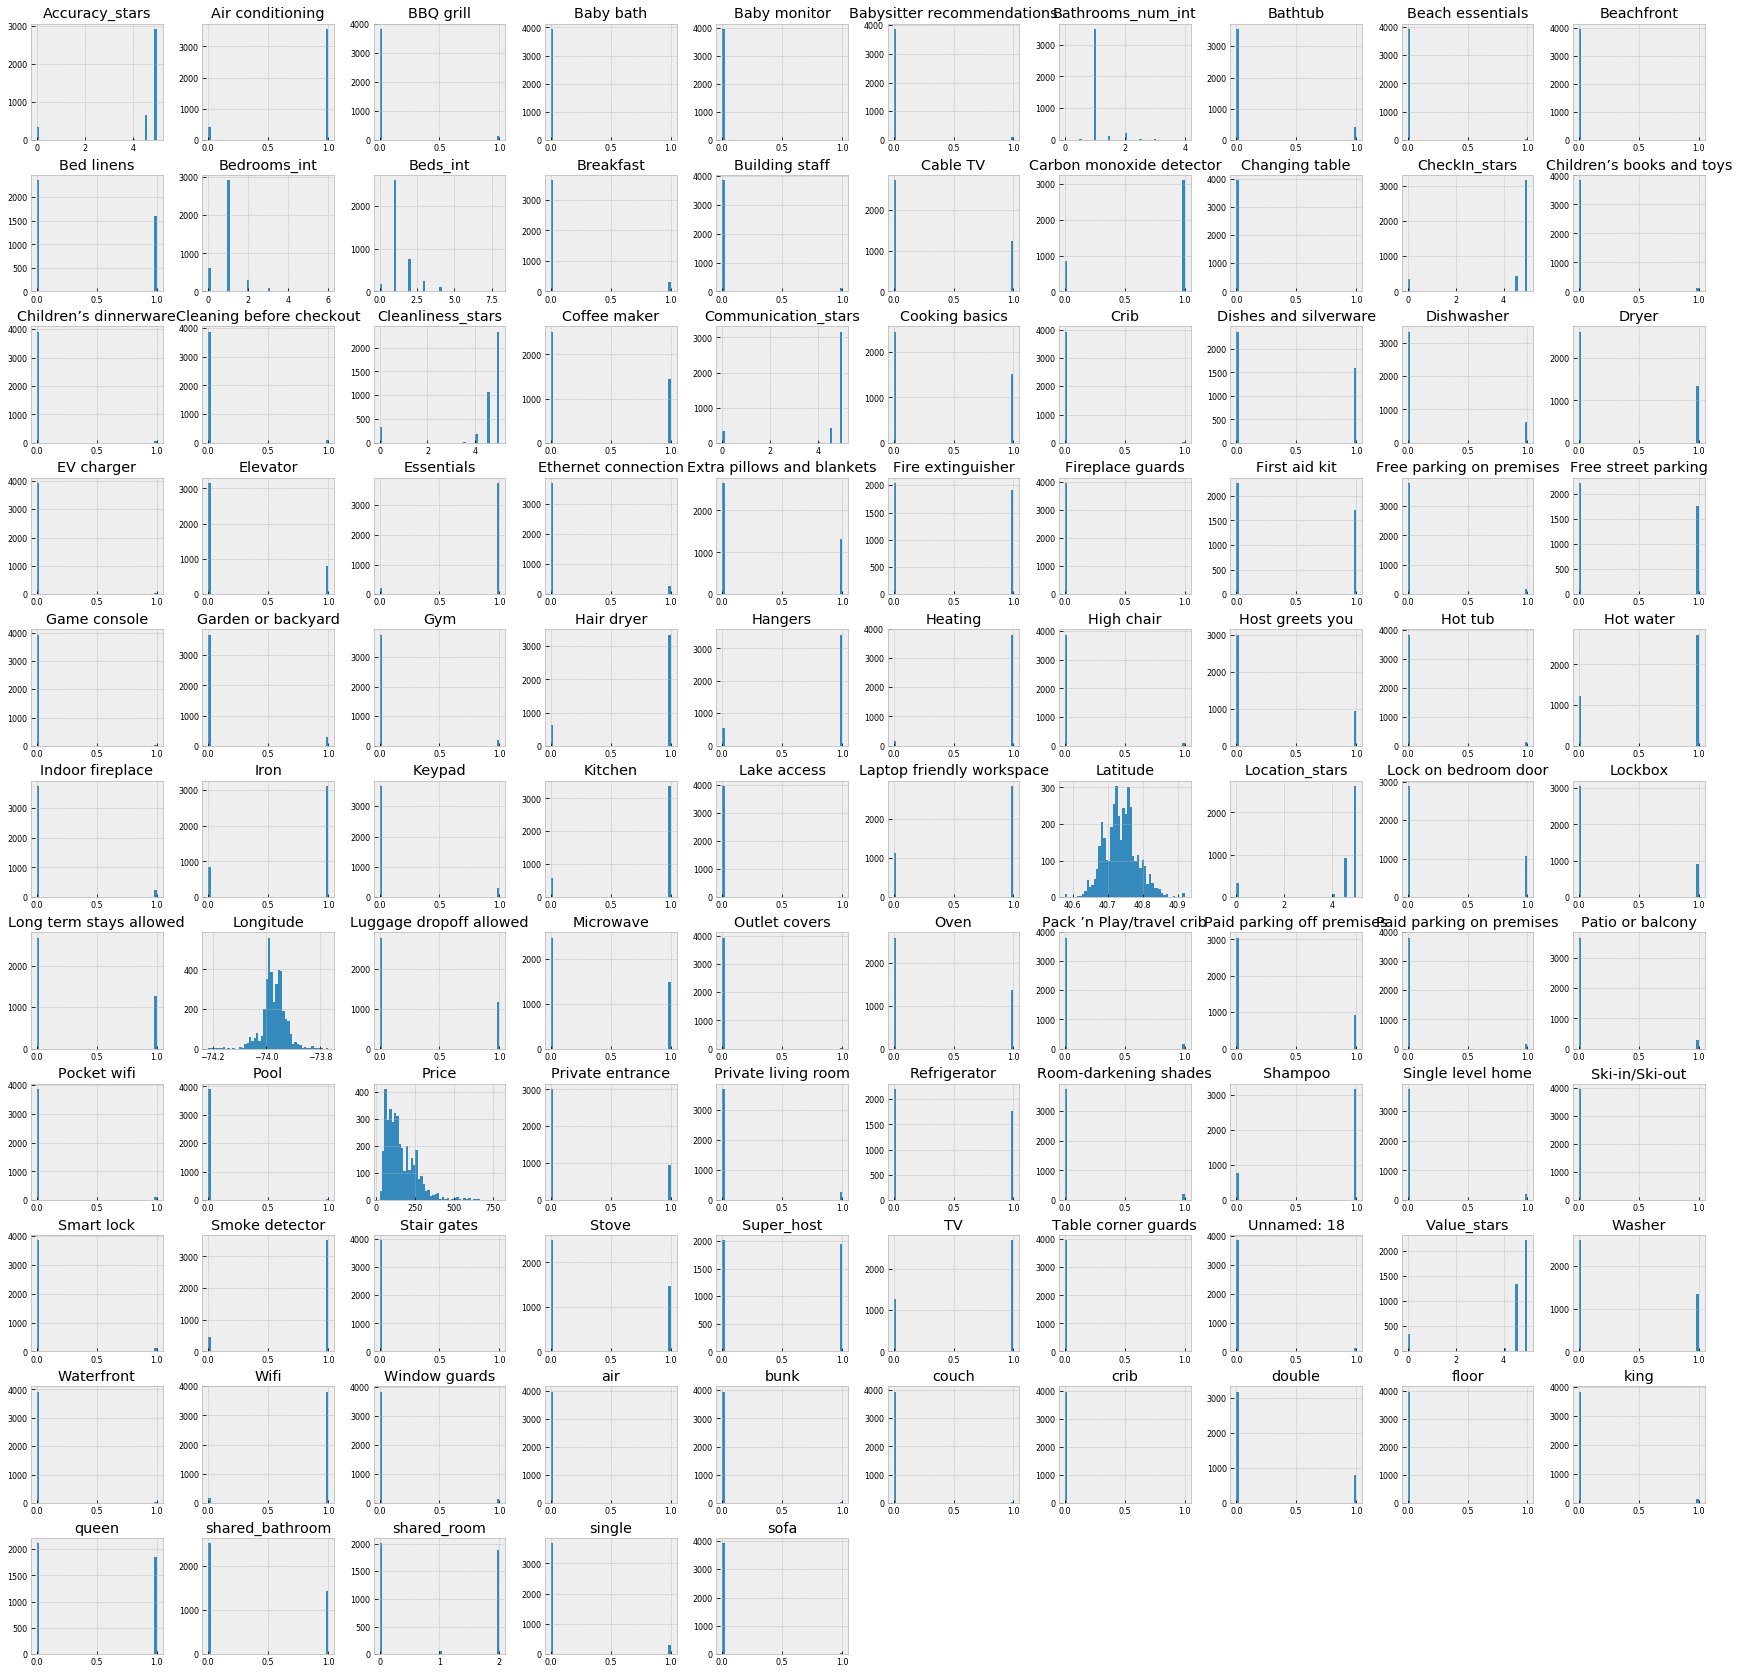

In [65]:
NewYorkData_num.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8);

### Bangkok

In [63]:
list(set(BangkokData.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [66]:
BangkokData_num = BangkokData.select_dtypes(include = ['float64', 'int64'])

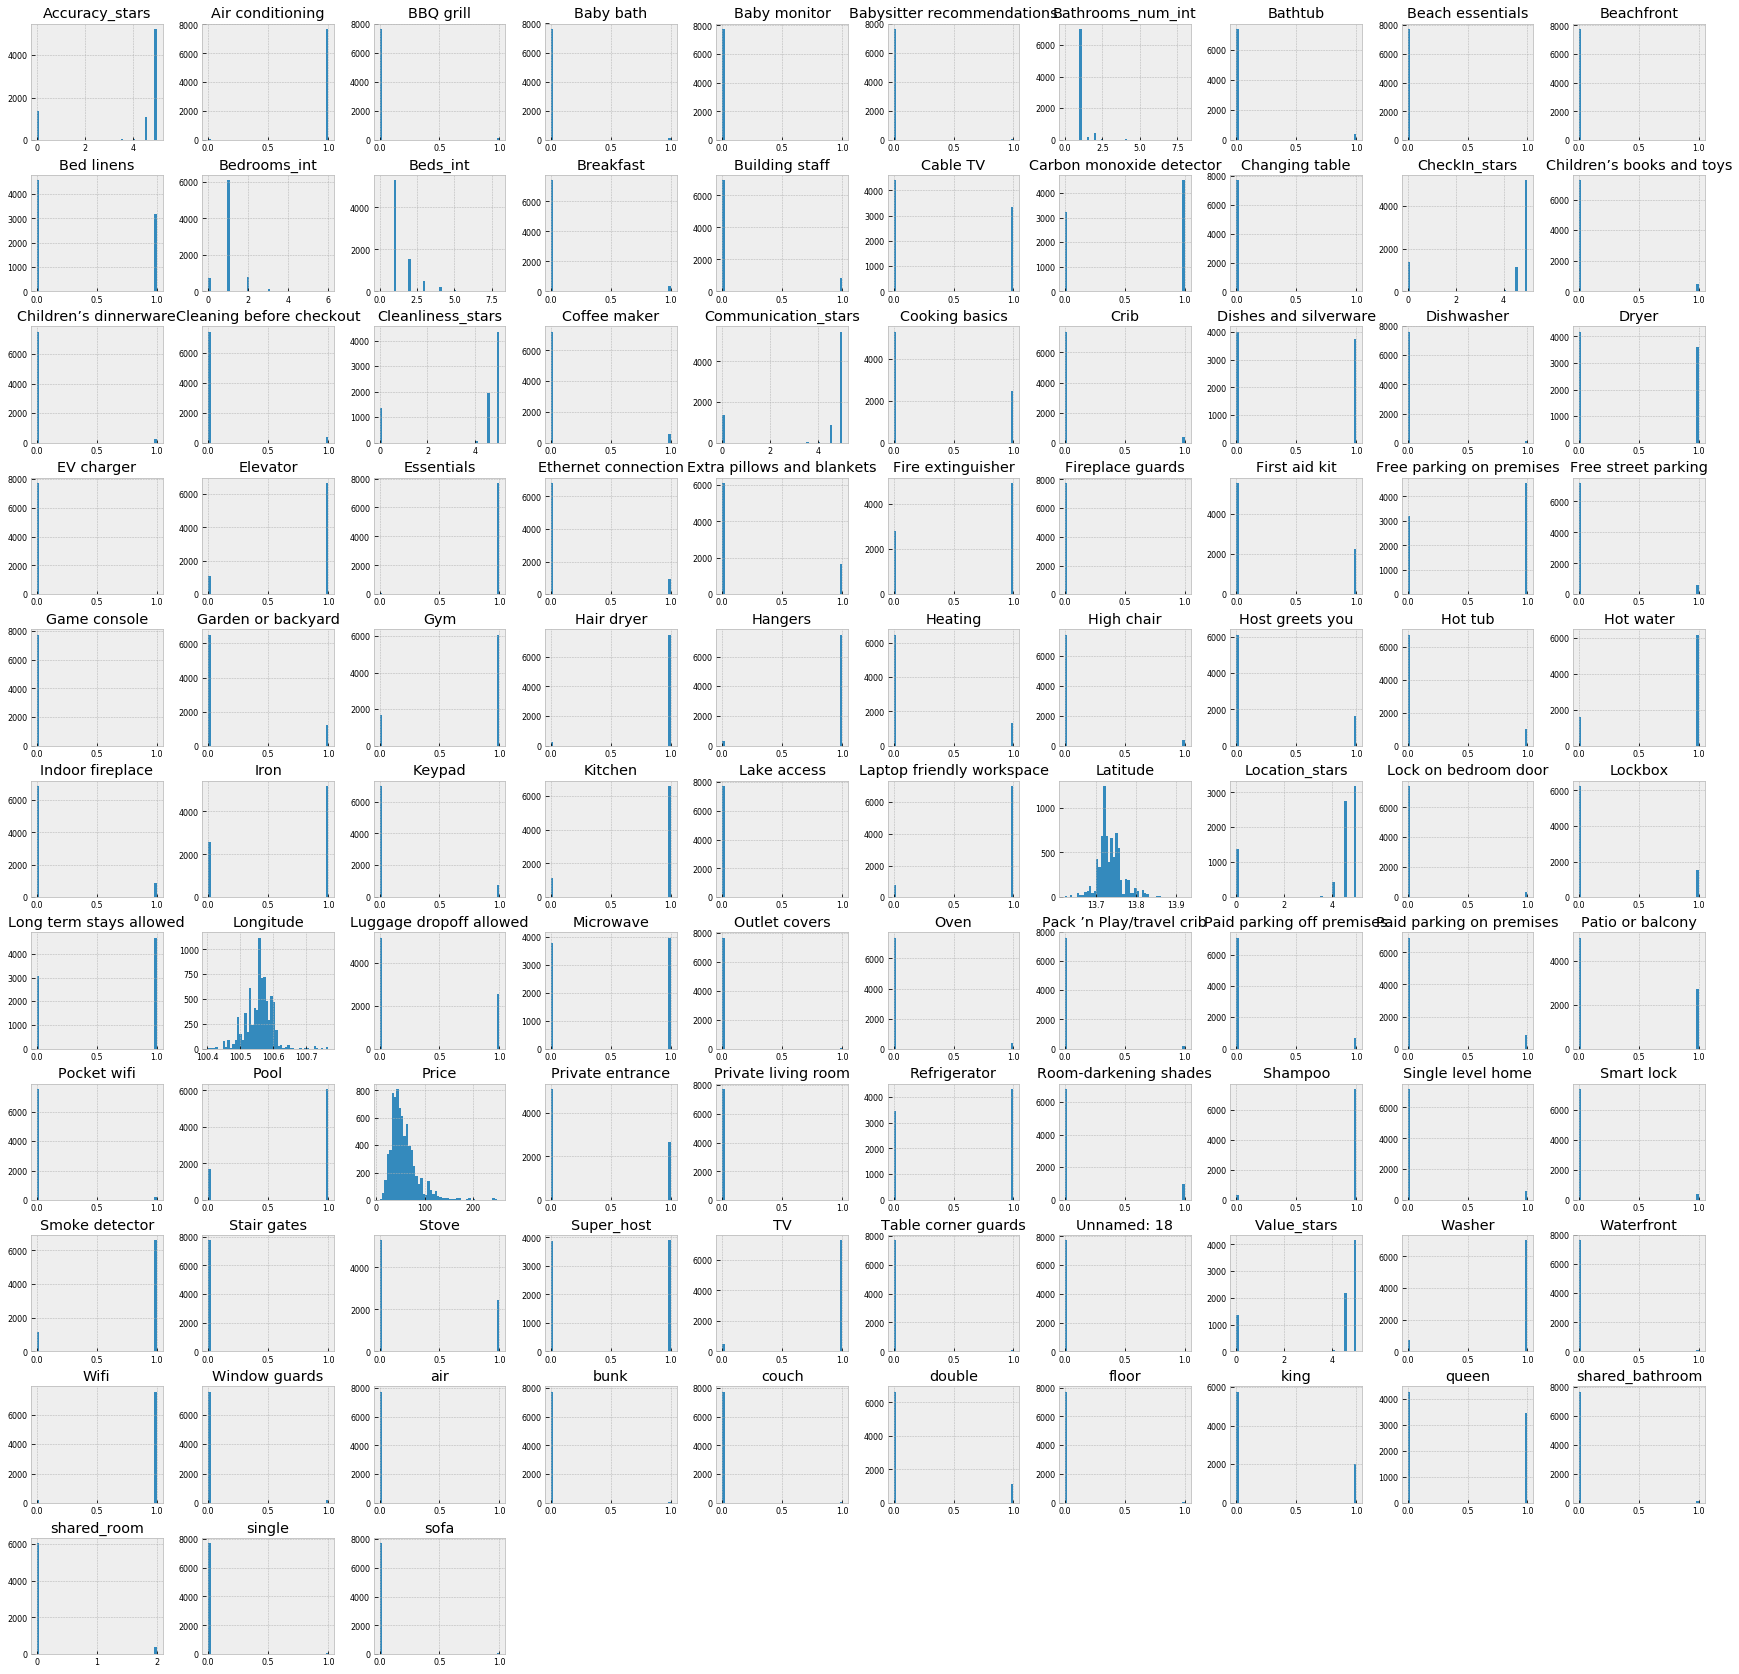

In [67]:
BangkokData_num.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8);

### Cairo

In [68]:
list(set(CairoData.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [69]:
CairoData_num = CairoData.select_dtypes(include = ['float64', 'int64'])

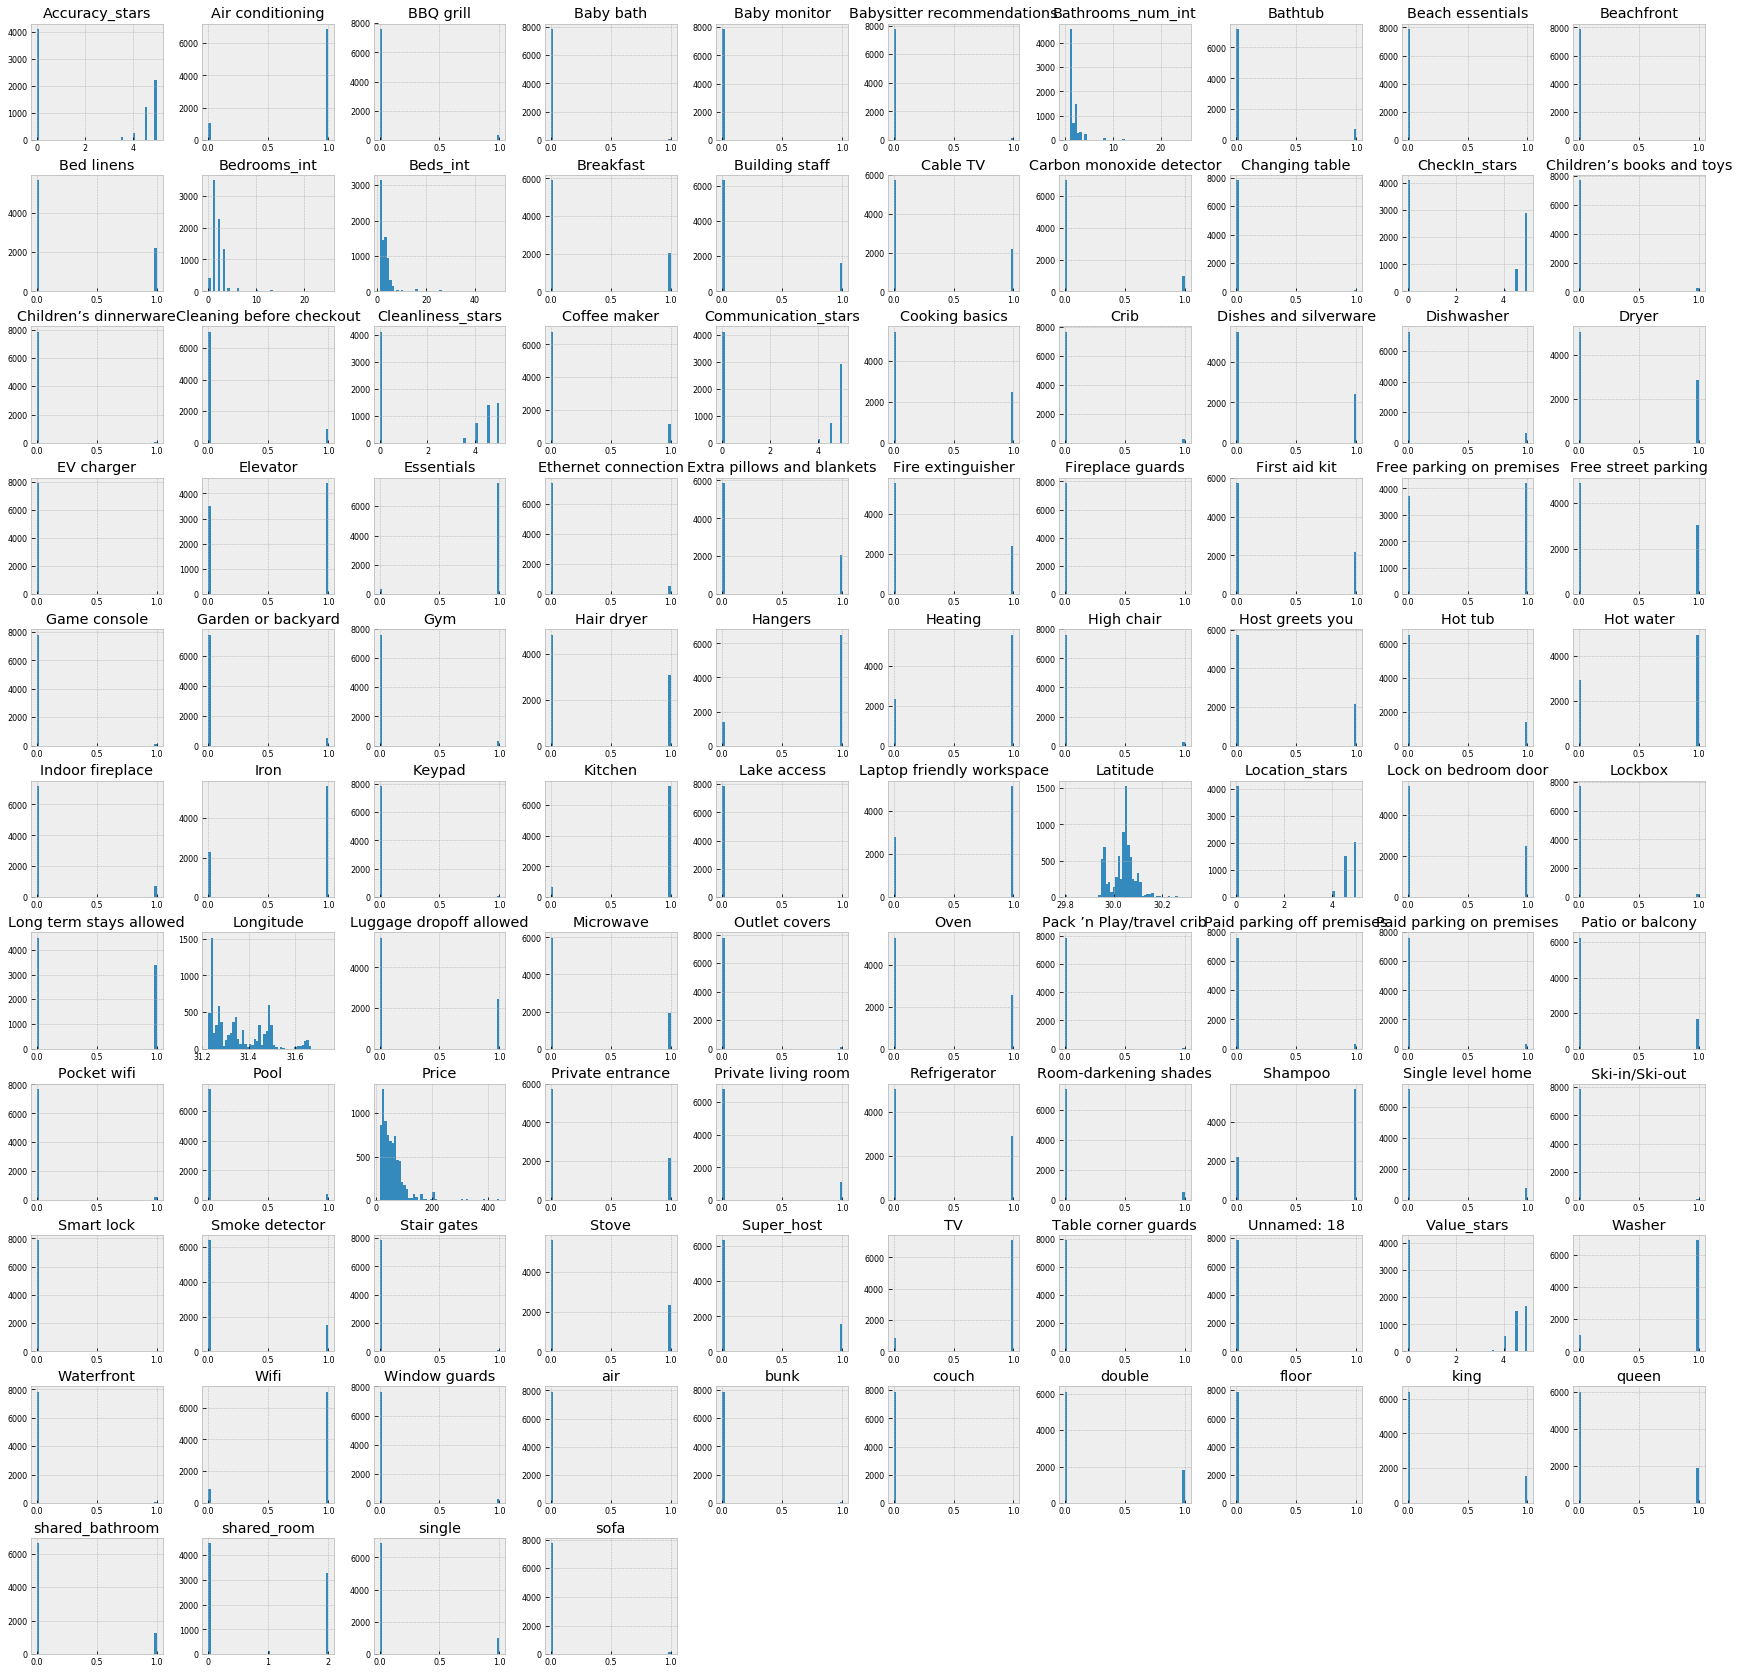

In [70]:
CairoData_num.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8);

As we see, most of the variables here are either binary such as the bed type : king, queen, double,etc or numeric with limited number of vlaues such as the review stars.

That was the individual distribution of different varibales. Let's explore some connections between those variables!


### NewYork

In [124]:
NewYorkData_corr=NewYorkData_num.corr()
NewYorkData_corr

,Price,Latitude,Longitude,Beds_int,Bedrooms_int,Bathrooms_num_int,shared_room,shared_bathroom,Super_host,CheckIn_stars,...,air,bunk,couch,crib,double,floor,king,queen,single,sofa
Price,1.000000,0.019750,-0.226378,0.443618,0.303045,0.150676,-0.633473,-0.511981,0.084713,0.010759,...,-0.000534,-0.056619,0.013735,0.027457,-0.157912,-0.018570,0.153489,0.248102,-0.221866,-0.018178
Latitude,0.019750,1.000000,0.077850,-0.039766,-0.065943,-0.059902,0.048084,0.061910,-0.035289,-0.005990,...,-0.012370,0.028436,-0.003340,0.010762,0.007801,0.007599,-0.044791,-0.005484,0.073457,0.002949
Longitude,-0.226378,0.077850,1.000000,-0.105252,-0.049156,-0.015983,0.141246,0.101357,0.001528,0.063670,...,-0.013540,-0.033180,0.015569,0.001364,0.071486,0.022212,-0.049858,-0.069485,0.073667,0.012924
Beds_int,0.443618,-0.039766,-0.105252,1.000000,0.575112,0.231974,-0.346805,-0.267578,-0.006373,-0.027710,...,-0.005195,0.017478,-0.050591,-0.010207,-0.060620,-0.012502,0.182379,0.195044,-0.046124,-0.004757
Bedrooms_int,0.303045,-0.065943,-0.049156,0.575112,1.000000,0.308861,-0.015534,0.003542,-0.004120,-0.035883,...,-0.037431,0.000509,-0.081638,-0.035342,-0.016062,-0.014283,0.136600,0.143493,0.020479,-0.045918
Bathrooms_num_int,0.150676,-0.059902,-0.015983,0.231974,0.308861,1.000000,0.061441,0.062591,0.033986,-0.013706,...,-0.008928,0.020498,-0.021924,-0.006311,-0.027246,-0.007731,0.083859,0.018372,0.020766,-0.026893
shared_room,-0.633473,0.048084,0.141246,-0.346805,-0.015534,0.061441,1.000000,0.765036,-0.017290,0.007893,...,-0.015120,0.021937,-0.030563,-0.022031,0.176257,0.010062,-0.103495,-0.200665,0.234046,-0.006941
shared_bathroom,-0.511981,0.061910,0.101357,-0.267578,0.003542,0.062591,0.765036,1.000000,-0.014244,0.020918,...,-0.007500,0.042934,-0.031953,-0.016991,0.204438,0.017367,-0.070939,-0.165272,0.252512,0.003778
Super_host,0.084713,-0.035289,0.001528,-0.006373,-0.004120,0.033986,-0.017290,-0.014244,1.000000,0.273178,...,0.016414,0.008980,-0.063862,0.022848,-0.030131,-0.027110,0.052053,0.051894,0.054487,0.006582
CheckIn_stars,0.010759,-0.005990,0.063670,-0.027710,-0.035883,-0.013706,0.007893,0.020918,0.273178,1.000000,...,0.011278,-0.034260,0.024211,0.007973,-0.000939,-0.023003,-0.006443,-0.046305,0.023675,0.018240


In [125]:
valuable_feats_NY = NewYorkData_corr['Price'][abs(NewYorkData_corr['Price']) > 0.5]
valuable_feats_NY

Price              1.000000
shared_room       -0.633473
shared_bathroom   -0.511981
Name: Price, dtype: float64

### Bangkok

In [126]:
BangkokData_corr= BangkokData_num.corr()
BangkokData_corr

,Price,Latitude,Longitude,Beds_int,Bedrooms_int,Bathrooms_num_int,shared_room,shared_bathroom,Super_host,CheckIn_stars,...,Window guards,air,bunk,couch,double,floor,king,queen,single,sofa
Price,1.000000,0.065769,-0.092433,0.436478,0.567879,0.408320,-0.179574,-0.149778,0.180583,0.053555,...,0.005908,-0.025132,-0.097638,-0.056817,-0.049804,-0.053945,0.287205,-0.111464,-0.099705,-0.064032
Latitude,0.065769,1.000000,-0.185423,0.063465,0.006806,0.019517,0.016123,-0.042205,-0.010558,0.034708,...,0.011218,-0.002491,0.002858,-0.003847,-0.012737,-0.037976,0.088191,-0.055099,-0.008222,0.014048
Longitude,-0.092433,-0.185423,1.000000,-0.073556,-0.067759,-0.065525,0.048833,-0.023281,-0.129979,-0.043611,...,-0.031657,0.016013,-0.077334,-0.000685,0.061130,-0.054940,-0.096419,0.073325,-0.026063,-0.062312
Beds_int,0.436478,0.063465,-0.073556,1.000000,0.571012,0.580281,-0.074554,0.041484,0.104659,0.008165,...,-0.009135,-0.026624,0.216737,-0.035255,-0.041784,-0.039089,0.157083,-0.057943,0.094414,-0.043874
Bedrooms_int,0.567879,0.006806,-0.067759,0.571012,1.000000,0.557340,-0.137236,-0.019677,0.091641,0.023629,...,0.022776,-0.022116,-0.006771,-0.061332,0.016967,-0.028174,0.204024,0.005701,-0.075564,-0.070646
Bathrooms_num_int,0.408320,0.019517,-0.065525,0.580281,0.557340,1.000000,0.064419,0.303406,0.085666,0.037005,...,-0.007873,-0.014494,0.243693,-0.017515,-0.041236,-0.020955,0.169247,-0.107707,-0.023591,-0.023353
shared_room,-0.179574,0.016123,0.048833,-0.074554,-0.137236,0.064419,1.000000,0.375826,-0.059595,0.017952,...,-0.041753,-0.014371,0.116048,-0.009689,-0.046228,-0.019305,-0.032938,-0.064636,0.076288,-0.011287
shared_bathroom,-0.149778,-0.042205,-0.023281,0.041484,-0.019677,0.303406,0.375826,1.000000,-0.005027,-0.001853,...,-0.017560,-0.006241,0.398555,-0.007542,0.000261,-0.009023,-0.012843,-0.040052,0.057319,-0.010056
Super_host,0.180583,-0.010558,-0.129979,0.104659,0.091641,0.085666,-0.059595,-0.005027,1.000000,0.213072,...,0.060192,0.032330,0.023213,-0.052173,-0.021847,-0.029268,-0.024299,0.032369,0.031386,0.011297
CheckIn_stars,0.053555,0.034708,-0.043611,0.008165,0.023629,0.037005,0.017952,-0.001853,0.213072,1.000000,...,0.034258,-0.113687,0.028888,-0.023348,-0.168750,0.023348,0.090267,-0.017637,0.001733,-0.017171


In [127]:
valuable_feats_Bngkok = BangkokData_corr['Price'][abs(BangkokData_corr['Price']) > 0.5]
valuable_feats_Bngkok

Price           1.000000
Bedrooms_int    0.567879
Name: Price, dtype: float64

### Cairo

In [128]:
CairoData_corr=CairoData_num.corr()
CairoData_corr

,Price,Latitude,Longitude,Beds_int,Bedrooms_int,Bathrooms_num_int,shared_room,shared_bathroom,Super_host,CheckIn_stars,...,Window guards,air,bunk,couch,double,floor,king,queen,single,sofa
Price,1.000000,-0.139900,0.112766,0.155787,0.180418,0.174348,-0.415663,-0.326417,0.016063,-0.028501,...,0.035398,-0.006305,-0.067717,-0.051518,-0.020637,-0.018169,0.167372,0.123536,-0.144145,0.005020
Latitude,-0.139900,1.000000,0.394063,0.049565,-0.001073,-0.025501,0.041747,-0.001175,-0.027620,-0.026943,...,0.026433,0.027367,0.055924,0.029144,0.025720,0.008470,-0.054417,-0.135465,0.044993,-0.033497
Longitude,0.112766,0.394063,1.000000,-0.066287,-0.104167,-0.075311,-0.337510,-0.110541,0.007716,-0.121476,...,-0.000793,0.009769,-0.030957,0.067719,-0.001453,-0.042463,0.013697,0.109507,-0.170775,0.139238
Beds_int,0.155787,0.049565,-0.066287,1.000000,0.727412,0.609294,-0.091055,-0.178185,-0.057666,0.032259,...,0.050084,-0.002637,0.038564,-0.032567,-0.033597,-0.028552,0.074048,-0.019622,0.027090,-0.061804
Bedrooms_int,0.180418,-0.001073,-0.104167,0.727412,1.000000,0.654459,-0.035914,-0.120667,-0.070433,0.076977,...,0.039158,-0.008080,-0.035464,-0.026065,0.033738,-0.022851,0.052266,-0.003040,0.051977,-0.075310
Bathrooms_num_int,0.174348,-0.025501,-0.075311,0.609294,0.654459,1.000000,0.038065,-0.108551,-0.051980,-0.007883,...,-0.002257,0.005382,-0.022198,-0.023108,-0.001667,-0.020259,0.053848,-0.025338,-0.025402,-0.044401
shared_room,-0.415663,0.041747,-0.337510,-0.091055,-0.035914,0.038065,1.000000,0.507094,-0.123872,-0.095221,...,-0.107457,0.023008,0.051939,0.006567,0.062081,-0.038578,-0.171192,-0.290254,0.335979,-0.088497
shared_bathroom,-0.326417,-0.001175,-0.110541,-0.178185,-0.120667,-0.108551,0.507094,1.000000,0.045235,0.036624,...,-0.062599,-0.012125,0.071672,0.124627,0.184595,-0.022157,-0.080745,-0.137551,0.094057,-0.055307
Super_host,0.016063,-0.027620,0.007716,-0.057666,-0.070433,-0.051980,-0.123872,0.045235,1.000000,0.361268,...,0.017667,-0.013786,-0.039097,-0.028735,0.053715,-0.025192,0.111889,0.032557,-0.141235,-0.018887
CheckIn_stars,-0.028501,-0.026943,-0.121476,0.032259,0.076977,-0.007883,-0.095221,0.036624,0.361268,1.000000,...,0.078653,0.020556,0.004909,-0.055247,0.001570,0.049602,0.094770,-0.024826,-0.080061,-0.091394


In [129]:
valuable_feats_Cairo = CairoData_corr['Price'][abs(CairoData_corr['Price']) > 0.5]
valuable_feats_Cairo

Price    1.0
Name: Price, dtype: float64

### Price Analysis

### NewYork

In [11]:
AvgPrice_NY = group_by_date(NewYorkData) 

In [12]:
#reate a data object
price_data = go.Scatter(x=AvgPrice_NY.index,y=AvgPrice_NY.values)

#set up the plot layout
layout1 = go.Layout(title='NY_ Average Price Plot', xaxis=dict(title='CheckIn_Date'),yaxis=dict(title='Price'))

# create a figure and display it
fig1 = go.Figure(data=[price_data],layout=layout1)


#display the plot interactively
iplot(fig1)


### Bangkok

In [19]:
AvgPrice_Bngkok = group_by_date(BangkokData) 

In [20]:
#reate a data object
price_data_Bngkok = go.Scatter(x=AvgPrice_Bngkok.index,y=AvgPrice_Bngkok.values)
#set up the plot layout
layout2 = go.Layout(title='Bangkok_ Average Price Plot', xaxis=dict(title='CheckIn_Date'),yaxis=dict(title='Price'))
# create a figure and display it
fig2 = go.Figure(data=[price_data_Bngkok],layout=layout2)
#display the plot interactively
iplot(fig2)


### Cairo

In [17]:
AvgPrice_Cairo = group_by_date(CairoData)


In [18]:
#reate a data object
price_data_Cairo = go.Scatter(x=AvgPrice_Cairo.index,y=AvgPrice_Cairo.values)

#set up the plot layout
layout3 = go.Layout(title='Cairo_ Average Price Plot', xaxis=dict(title='CheckIn_Date'),yaxis=dict(title='Price'))

# create a figure and display it
fig3 = go.Figure(data=[price_data_Cairo],layout=layout3)

#display the plot interactively
iplot(fig3)


surprisingly,with those exploratory plots for the average price,we can see a pretty strong trend for them increasing with time for the three cities. So it looks like as we book later, we can get cheaper deals for renting a house/apartment no matter the month of the year!!  

In [71]:
NewYorkData_num.columns

Index(['Price', 'Latitude', 'Longitude', 'Beds_int', 'Bedrooms_int',
       'Bathrooms_num_int', 'shared_room', 'shared_bathroom', 'Super_host',
       'CheckIn_stars',
       ...
       'air', 'bunk', 'couch', 'crib', 'double', 'floor', 'king', 'queen',
       'single', 'sofa'],
      dtype='object', length=105)

## Location

### NewYork

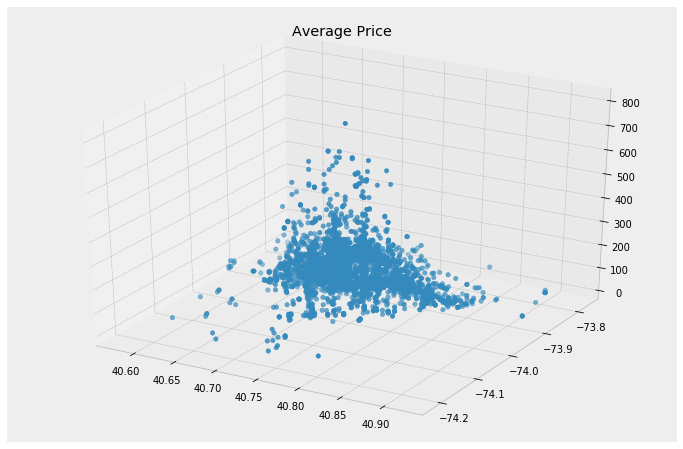

In [110]:
X = NewYorkData_num['Latitude']
Y = NewYorkData_num['Longitude']
Z = NewYorkData_num['Price']

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111, projection='3d')

#ax = plt.axes(projection='3d')
ax.scatter3D(X,Y,Z)
ax.set_title('Average Price')
plt.show()


### Bangkok

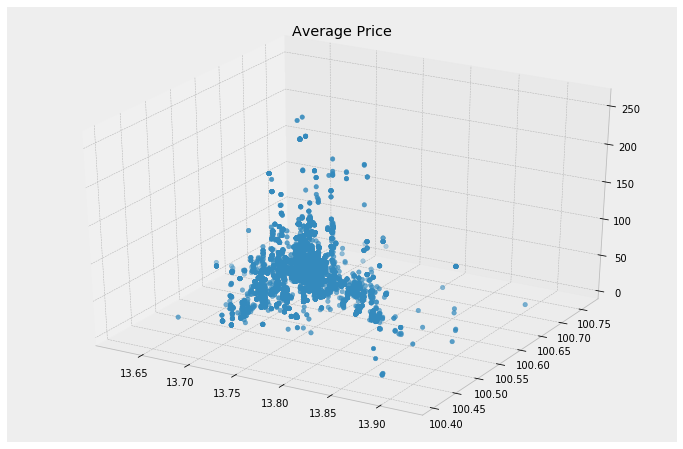

In [111]:
X = BangkokData_num['Latitude']
Y = BangkokData_num['Longitude']
Z = BangkokData_num['Price']

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111, projection='3d')

#ax = plt.axes(projection='3d')
ax.scatter3D(X,Y,Z)
ax.set_title('Average Price')
plt.show()


### Cairo

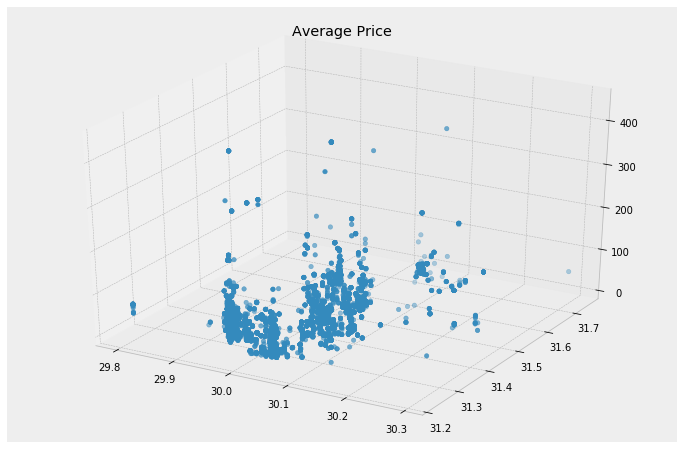

In [112]:
X = CairoData_num['Latitude']
Y = CairoData_num['Longitude']
Z = CairoData_num['Price']

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111, projection='3d')

#ax = plt.axes(projection='3d')
ax.scatter3D(X,Y,Z)
ax.set_title('Average Price')
plt.show()


In [130]:
NewYorkData_num.columns

Index(['Price', 'Latitude', 'Longitude', 'Beds_int', 'Bedrooms_int',
       'Bathrooms_num_int', 'shared_room', 'shared_bathroom', 'Super_host',
       'CheckIn_stars',
       ...
       'air', 'bunk', 'couch', 'crib', 'double', 'floor', 'king', 'queen',
       'single', 'sofa'],
      dtype='object', length=105)

## Number of Bedrooms, Beds, Bathrooms

### NewYork

In [147]:
group1_data_NY =  NewYorkData_num[['Price','Beds_int', 'Bedrooms_int','Bathrooms_num_int']]

In [148]:
group1_data_NY.corr()['Price']

Price                1.000000
Beds_int             0.443618
Bedrooms_int         0.303045
Bathrooms_num_int    0.150676
Name: Price, dtype: float64

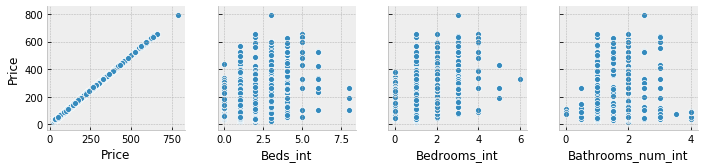

In [149]:
sns.pairplot(data=group1_data_NY,x_vars=group1_data_NY.columns,y_vars=['Price'])

### Bangkok

In [141]:
group1_data_Bangkok =  BangkokData_num[['Price','Beds_int', 'Bedrooms_int','Bathrooms_num_int']]

In [142]:
group1_data_Bangkok.corr()['Price']

Price                1.000000
Beds_int             0.436478
Bedrooms_int         0.567879
Bathrooms_num_int    0.408320
Name: Price, dtype: float64

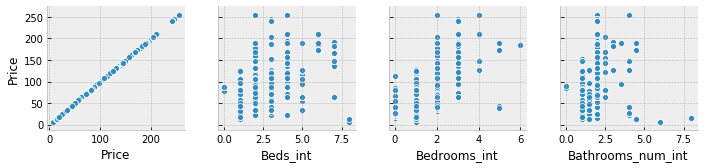

In [143]:
sns.pairplot(data=group1_data_Bangkok,x_vars=group1_data_Bangkok .columns,y_vars=['Price'])

### Cairo

In [144]:
group1_data_cairo =  CairoData_num[['Price','Beds_int', 'Bedrooms_int','Bathrooms_num_int']]

In [145]:
group1_data_cairo.corr()['Price']

Price                1.000000
Beds_int             0.155787
Bedrooms_int         0.180418
Bathrooms_num_int    0.174348
Name: Price, dtype: float64

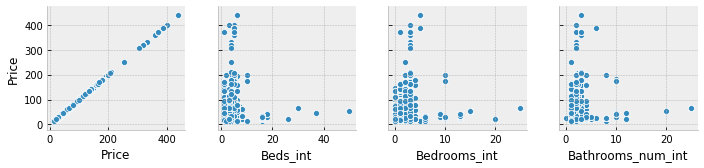

In [146]:
sns.pairplot(data= group1_data_cairo,x_vars= group1_data_cairo.columns,y_vars=['Price'])

# Categorical Features

## which kind of amenities can increase the renting price?! 

### NewYork

In [198]:
Amenities_list_NY = NewYorkData.columns[18:-10]

In [199]:
Amenities_NY = NewYorkData_num[Amenities_list_NY]
Amenities_NY['Price']= NewYorkData['Price']
Amenities_NY.head()

,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Bathtub,Beach essentials,Beachfront,Bed linens,Breakfast,...,Smoke detector,Stair gates,Stove,TV,Table corner guards,Washer,Waterfront,Wifi,Window guards,Price
0,1,0,0,0,0,1,0,0,0,0,...,1,0,1,1,0,0,0,1,0,244.0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,62.0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,44.0
3,1,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,78.0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,80.0


In [200]:
Amenities_NY.corr()['Price']

Air conditioning              0.151064
BBQ grill                     0.052155
Baby bath                     0.010876
Baby monitor                  0.002321
Babysitter recommendations    0.062336
Bathtub                       0.122837
Beach essentials             -0.009202
Beachfront                   -0.036884
Bed linens                    0.037253
Breakfast                    -0.100407
Building staff                0.028017
Cable TV                      0.215435
Carbon monoxide detector      0.067765
Changing table               -0.008555
Children’s books and toys     0.099089
Children’s dinnerware         0.045910
Cleaning before checkout      0.006669
Coffee maker                  0.104020
Cooking basics                0.091044
Crib                          0.058735
Dishes and silverware         0.101199
Dishwasher                    0.183365
Dryer                         0.170467
EV charger                   -0.011176
Elevator                      0.129303
Essentials               

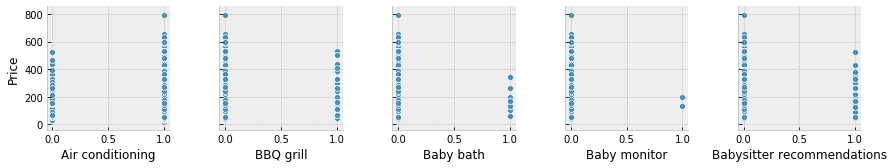

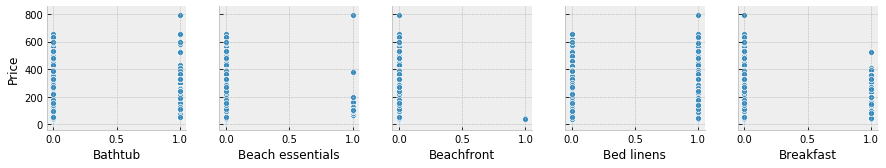

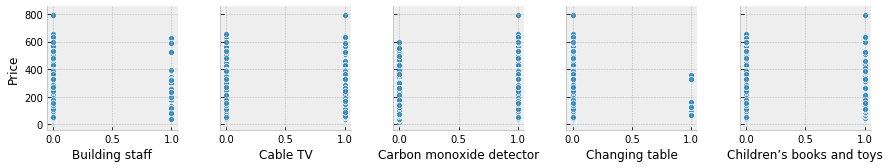

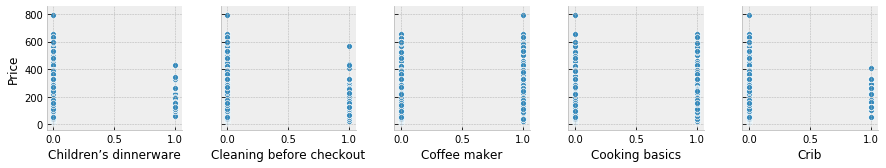

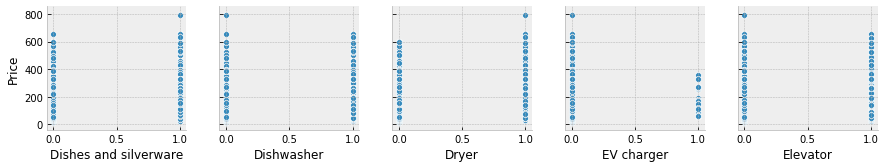

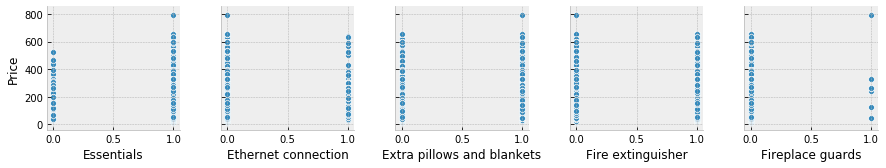

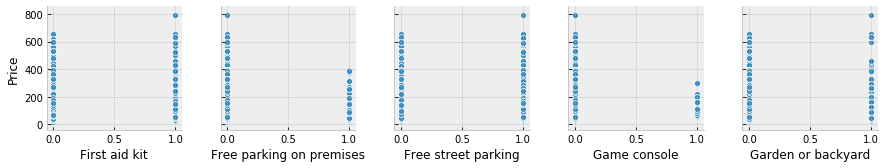

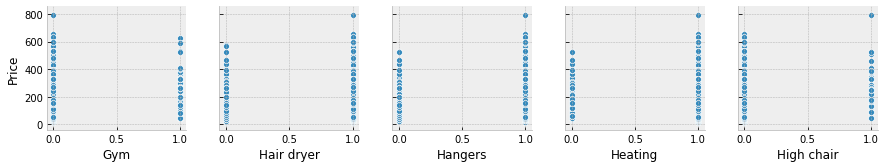

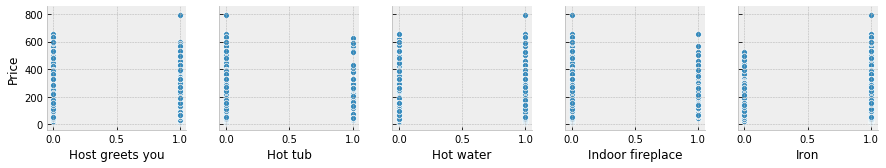

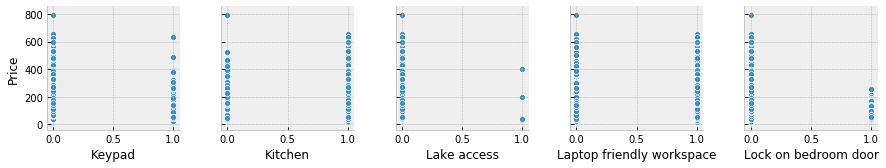

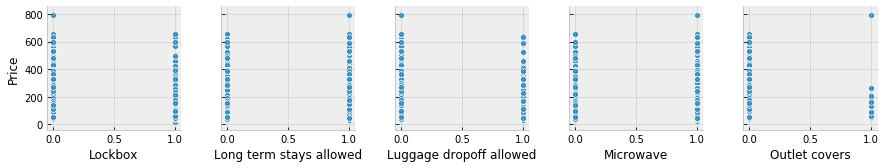

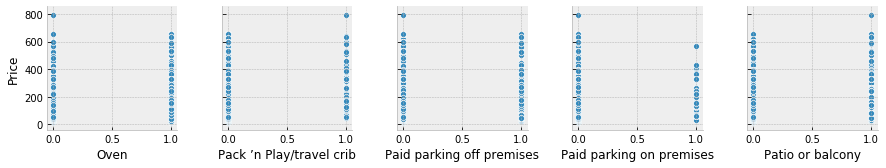

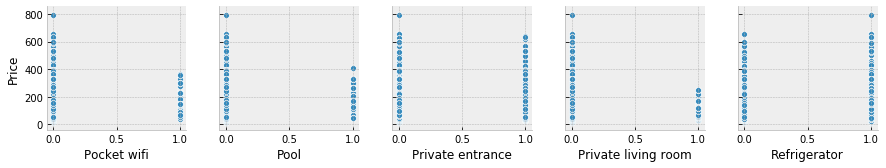

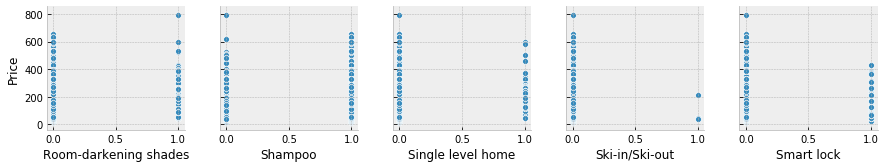

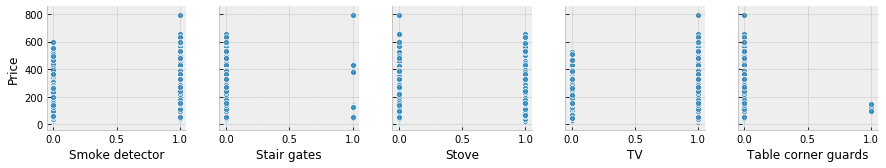

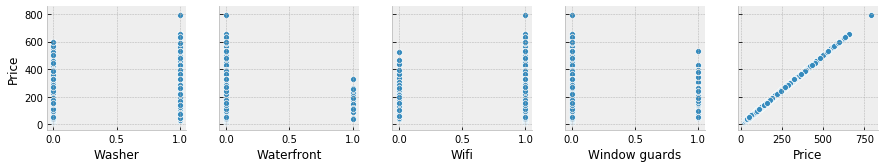

In [201]:
#sns.pairplot(data= Amenities_NY,x_vars= Amenities_NY.columns,y_vars=['Price'])

for i in range(0, len(Amenities_NY.columns), 5):
    sns.pairplot(data=Amenities_NY,x_vars=Amenities_NY.columns[i:i+5],y_vars=['Price'])

### Bangkok

In [190]:
Amenities_list_Bangkok = BangkokData.columns[18:-9]
Amenities_Bangkok = BangkokData[Amenities_list_Bangkok]
Amenities_Bangkok['Price']= BangkokData['Price']
Amenities_Bangkok.head()

,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Bathtub,Beach essentials,Beachfront,Bed linens,Breakfast,...,Smoke detector,Stair gates,Stove,TV,Table corner guards,Washer,Waterfront,Wifi,Window guards,Price
0,1,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,1,0,34.0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,48.0
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,27.0
3,1,0,0,0,0,0,0,0,1,1,...,1,0,1,1,0,1,0,1,1,35.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,34.0


In [191]:
Amenities_Bangkok.corr()['Price']

Air conditioning              0.020883
BBQ grill                     0.061848
Baby bath                     0.113540
Baby monitor                  0.040635
Babysitter recommendations    0.016456
Bathtub                       0.182687
Beach essentials             -0.008279
Beachfront                    0.008222
Bed linens                   -0.002897
Breakfast                     0.095067
Building staff               -0.056486
Cable TV                      0.061822
Carbon monoxide detector      0.116127
Changing table                0.037154
Children’s books and toys     0.115129
Children’s dinnerware         0.021363
Cleaning before checkout     -0.006749
Coffee maker                  0.086583
Cooking basics                0.121277
Crib                          0.317308
Dishes and silverware         0.031455
Dishwasher                    0.081724
Dryer                        -0.075695
EV charger                    0.045482
Elevator                      0.024509
Essentials               

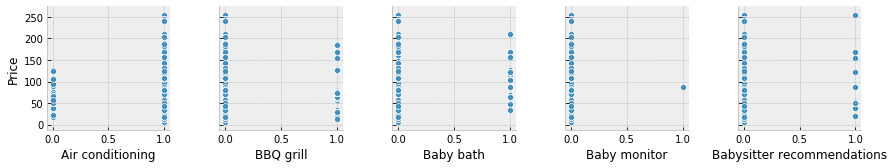

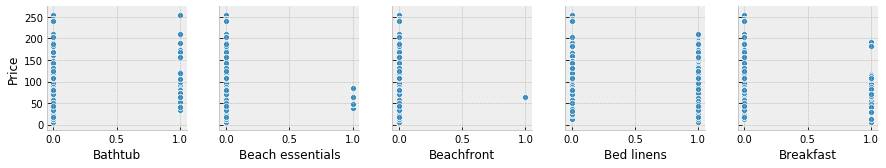

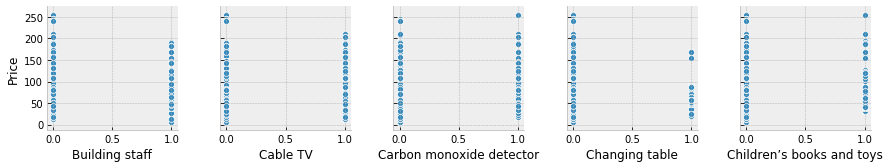

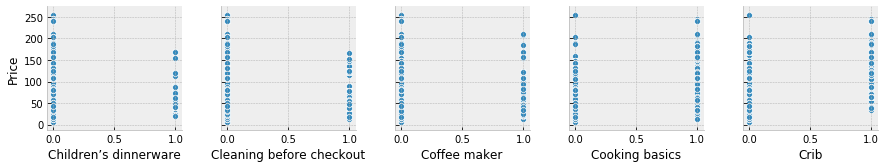

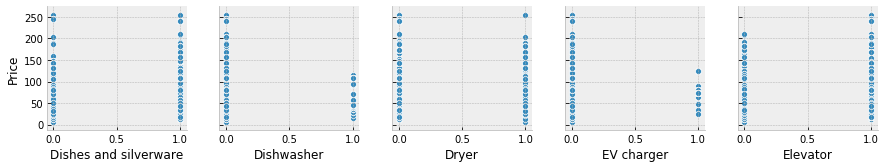

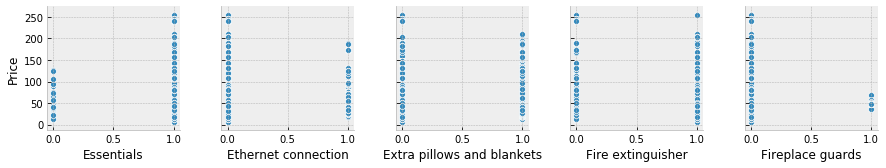

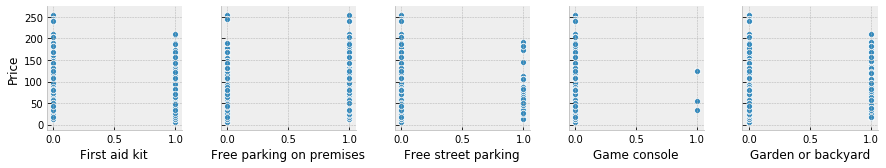

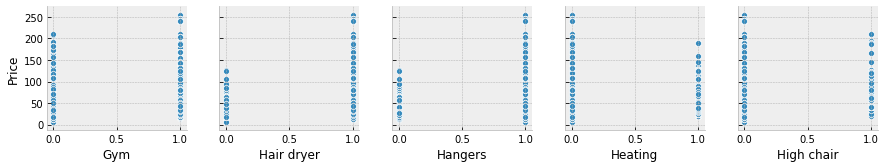

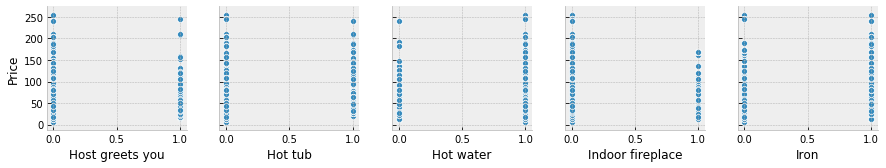

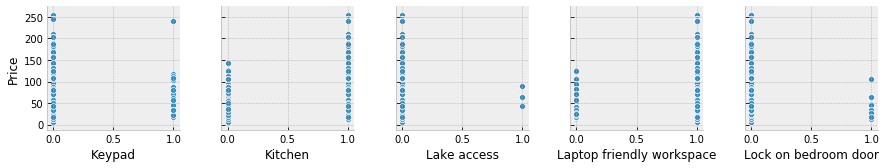

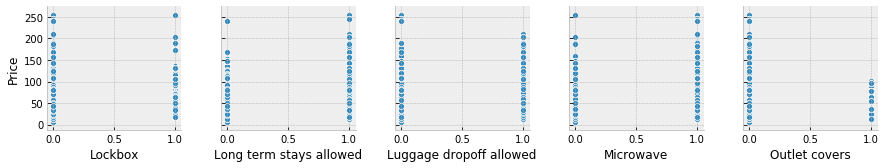

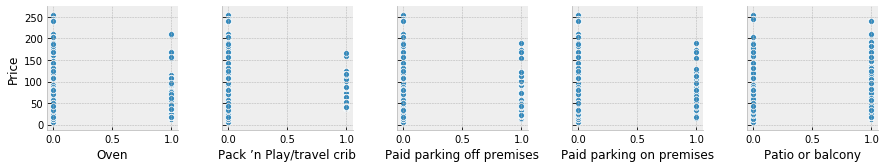

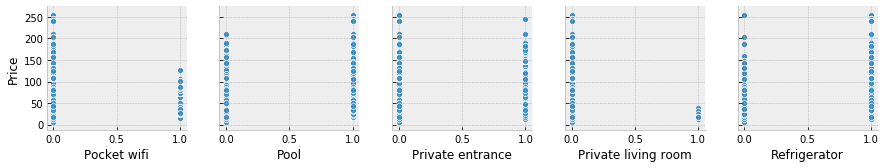

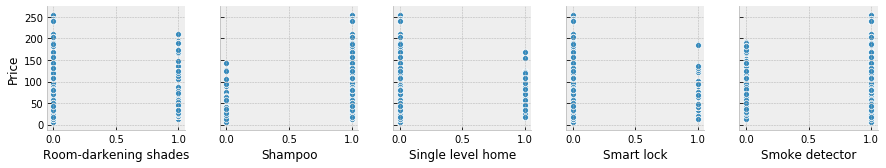

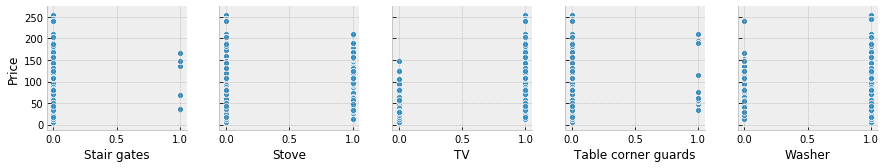

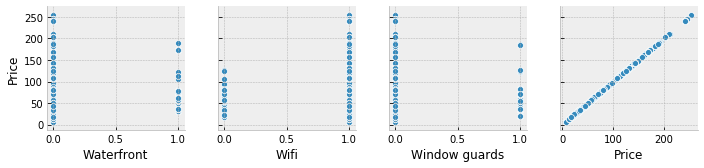

In [192]:
for i in range(0, len(Amenities_Bangkok.columns), 5):
    sns.pairplot(data=Amenities_Bangkok,x_vars=Amenities_Bangkok.columns[i:i+5],y_vars=['Price'])

### Cairo

In [205]:
Amenities_list_Cairo = CairoData.columns[18:-9]
Amenities_list_Cairo

Index(['Air conditioning', 'BBQ grill', 'Baby bath', 'Baby monitor',
       'Babysitter recommendations', 'Bathtub', 'Beach essentials',
       'Beachfront', 'Bed linens', 'Breakfast', 'Building staff', 'Cable TV',
       'Carbon monoxide detector', 'Changing table',
       'Children’s books and toys', 'Children’s dinnerware',
       'Cleaning before checkout', 'Coffee maker', 'Cooking basics', 'Crib',
       'Dishes and silverware', 'Dishwasher', 'Dryer', 'EV charger',
       'Elevator', 'Essentials', 'Ethernet connection',
       'Extra pillows and blankets', 'Fire extinguisher', 'Fireplace guards',
       'First aid kit', 'Free parking on premises', 'Free street parking',
       'Game console', 'Garden or backyard', 'Gym', 'Hair dryer', 'Hangers',
       'Heating', 'High chair', 'Host greets you', 'Hot tub', 'Hot water',
       'Indoor fireplace', 'Iron', 'Keypad', 'Kitchen', 'Lake access',
       'Laptop friendly workspace', 'Lock on bedroom door', 'Lockbox',
       'Long term stay

In [206]:
Amenities_Cairo = CairoData_num[Amenities_list_NY]
Amenities_Cairo['Price']= CairoData['Price']
Amenities_Cairo.head()

,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Bathtub,Beach essentials,Beachfront,Bed linens,Breakfast,...,Smoke detector,Stair gates,Stove,TV,Table corner guards,Washer,Waterfront,Wifi,Window guards,Price
0,1,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0,1,0,15.0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0,1,1,12.0
2,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,1,0,1,0,22.0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,19.0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,1,0,23.0


In [207]:
Amenities_Cairo.corr()['Price']

Air conditioning              0.178371
BBQ grill                     0.012848
Baby bath                    -0.002331
Baby monitor                  0.038610
Babysitter recommendations    0.074764
Bathtub                       0.073757
Beach essentials              0.098820
Beachfront                    0.051930
Bed linens                   -0.005847
Breakfast                    -0.120305
Building staff               -0.031220
Cable TV                      0.098999
Carbon monoxide detector      0.056597
Changing table                0.006064
Children’s books and toys     0.033621
Children’s dinnerware         0.133335
Cleaning before checkout     -0.064979
Coffee maker                 -0.009043
Cooking basics               -0.037265
Crib                          0.010958
Dishes and silverware        -0.019615
Dishwasher                    0.115372
Dryer                        -0.015118
EV charger                    0.098820
Elevator                      0.027888
Essentials               

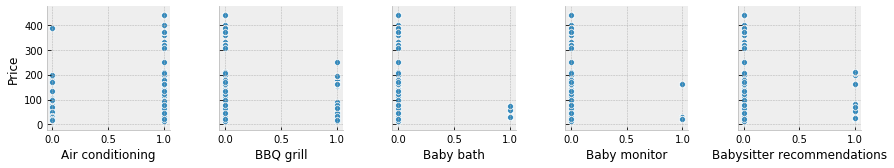

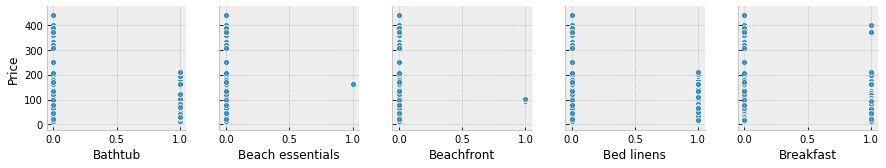

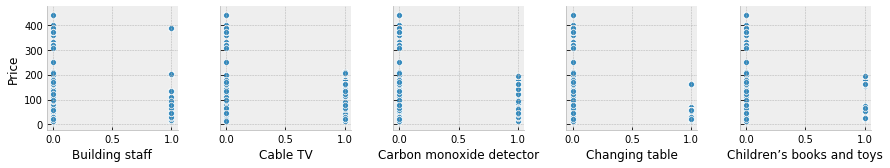

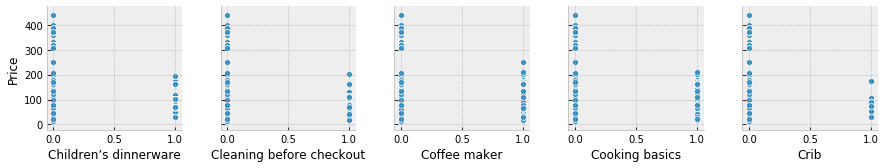

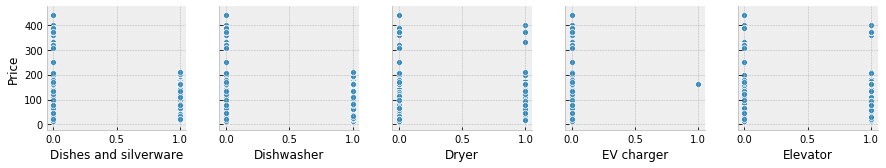

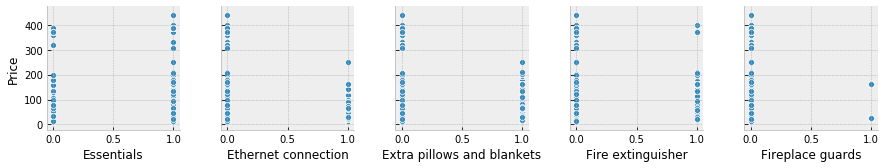

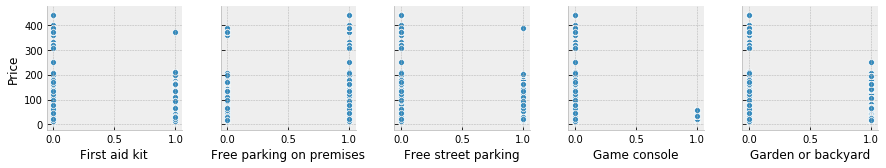

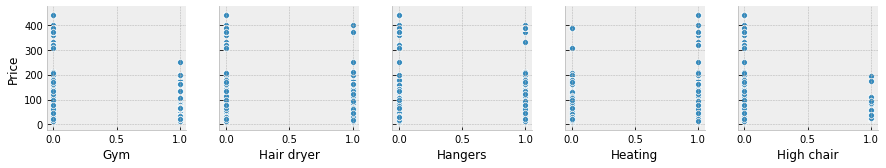

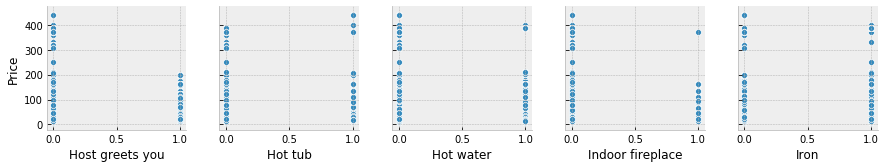

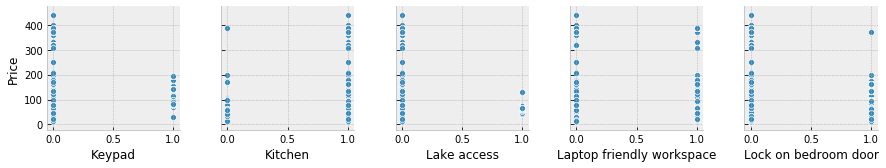

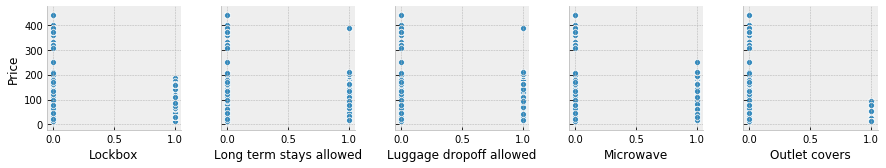

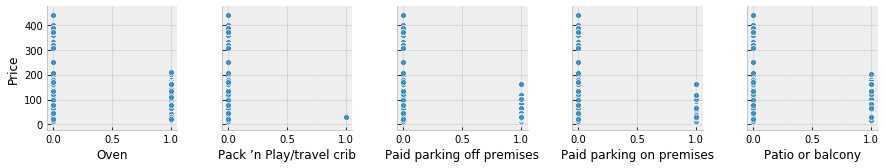

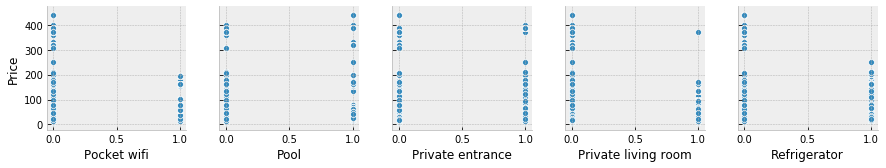

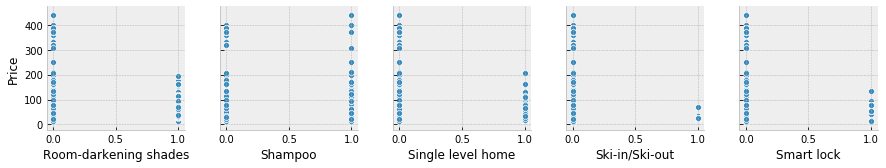

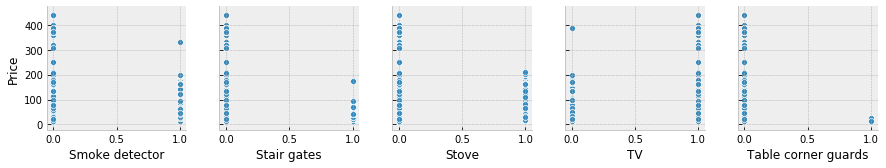

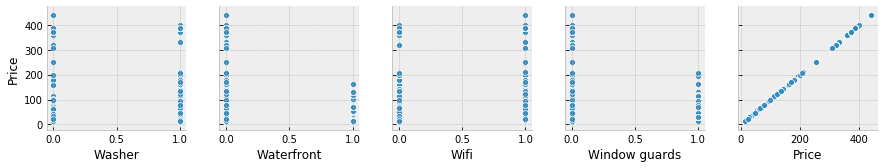

In [208]:
for i in range(0, len(Amenities_Cairo.columns), 5):
    sns.pairplot(data=Amenities_Cairo,x_vars=Amenities_Cairo.columns[i:i+5],y_vars=['Price'])

## Can the bed type affect the corresponding renting price

### NewYork

In [151]:
bed_data_NY = NewYorkData[['Price','air', 'bunk', 'couch', 'crib', 'double', 'floor', 'king', 'queen','single', 'sofa']]

In [152]:
bed_data_NY.corr()['Price']

Price     1.000000
air      -0.000534
bunk     -0.056619
couch     0.013735
crib      0.027457
double   -0.157912
floor    -0.018570
king      0.153489
queen     0.248102
single   -0.221866
sofa     -0.018178
Name: Price, dtype: float64

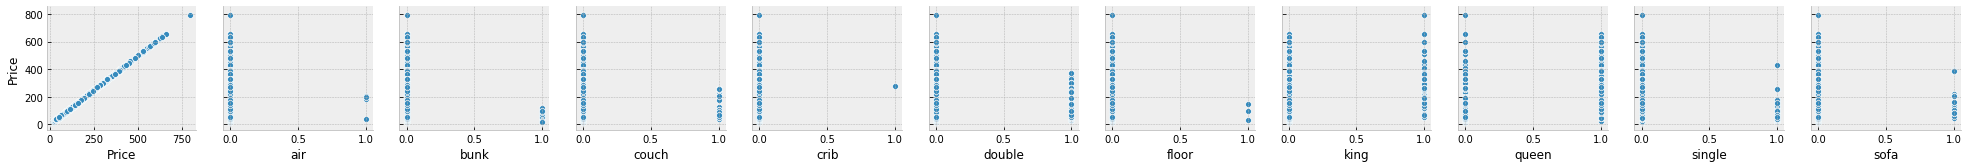

In [153]:
sns.pairplot(data= bed_data_NY,x_vars=bed_data_NY.columns,y_vars=['Price'])

### Bangkok

In [159]:
BangkokData.columns

Index(['Price', 'CheckIn', 'CheckOut', 'Latitude', 'Longitude', 'Beds_int',
       'Bedrooms_int', 'Bathrooms_num_int', 'shared_room', 'shared_bathroom',
       ...
       'Window guards', 'air', 'bunk', 'couch', 'double', 'floor', 'king',
       'queen', 'single', 'sofa'],
      dtype='object', length=105)

In [161]:
bed_data_Bangkok = BangkokData[['Price','air', 'bunk', 'couch', 'double', 'floor', 'king','queen', 'single', 'sofa']]

In [162]:
bed_data_Bangkok.corr()['Price']

Price     1.000000
air      -0.025132
bunk     -0.097638
couch    -0.056817
double   -0.049804
floor    -0.053945
king      0.287205
queen    -0.111464
single   -0.099705
sofa     -0.064032
Name: Price, dtype: float64

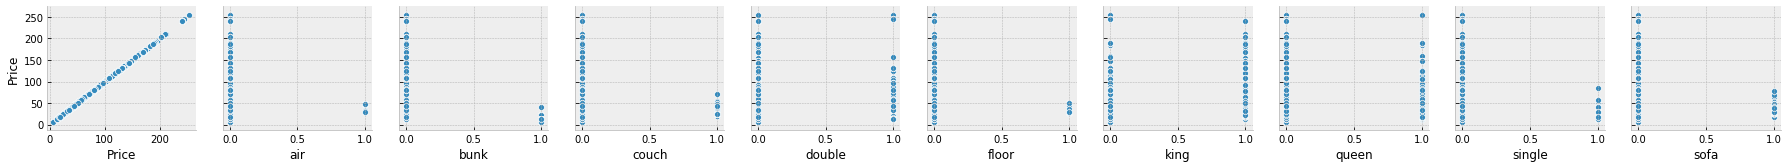

In [163]:
sns.pairplot(data= bed_data_Bangkok,x_vars=bed_data_Bangkok.columns,y_vars=['Price'])

### Cairo

In [165]:
CairoData.columns

Index(['Price', 'CheckIn', 'CheckOut', 'Latitude', 'Longitude', 'Beds_int',
       'Bedrooms_int', 'Bathrooms_num_int', 'shared_room', 'shared_bathroom',
       ...
       'Window guards', 'air', 'bunk', 'couch', 'double', 'floor', 'king',
       'queen', 'single', 'sofa'],
      dtype='object', length=106)

In [166]:
bed_data_Cairo = CairoData[['Price','air', 'bunk', 'couch', 'double', 'floor', 'king','queen', 'single', 'sofa']]

In [167]:
bed_data_Cairo.corr()['Price']

Price     1.000000
air      -0.006305
bunk     -0.067717
couch    -0.051518
double   -0.020637
floor    -0.018169
king      0.167372
queen     0.123536
single   -0.144145
sofa      0.005020
Name: Price, dtype: float64

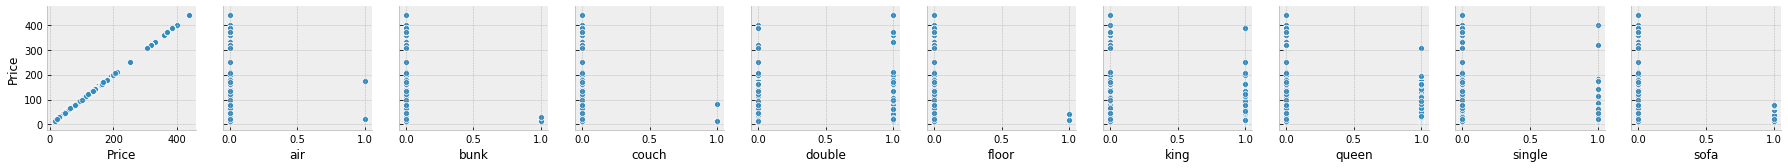

In [168]:
sns.pairplot(data= bed_data_Cairo,x_vars=bed_data_Cairo.columns,y_vars=['Price'])

For the three cities,it looks like we have higher renting prices having special kinds of beds such as "double", "single","king", and "queen" than with other types of beds!

## What is about the number of review stars?!

In [214]:
ReviewStarsNY_List = NewYorkData.columns[11:17]
ReviewStarsNY_List

Index(['CheckIn_stars', 'Accuracy_stars', 'Cleanliness_stars',
       'Communication_stars', 'Location_stars', 'Value_stars'],
      dtype='object')

In [219]:
ReviewStarsNY = NewYorkData_num[ReviewStarsNY_List]
ReviewStarsNY['Price'] = NewYorkData_num['Price']
ReviewStarsNY.head()

,CheckIn_stars,Accuracy_stars,Cleanliness_stars,Communication_stars,Location_stars,Value_stars,Price
0,5.0,5.0,5.0,5.0,5.0,4.5,244.0
1,4.5,4.5,4.0,4.5,5.0,4.0,62.0
2,5.0,5.0,5.0,5.0,4.5,5.0,44.0
3,5.0,5.0,5.0,5.0,5.0,5.0,78.0
4,5.0,5.0,5.0,5.0,4.5,5.0,80.0


In [220]:
ReviewStarsNY.corr()['Price']


CheckIn_stars          0.010759
Accuracy_stars         0.024116
Cleanliness_stars      0.040625
Communication_stars    0.023310
Location_stars         0.072164
Value_stars            0.003400
Price                  1.000000
Name: Price, dtype: float64

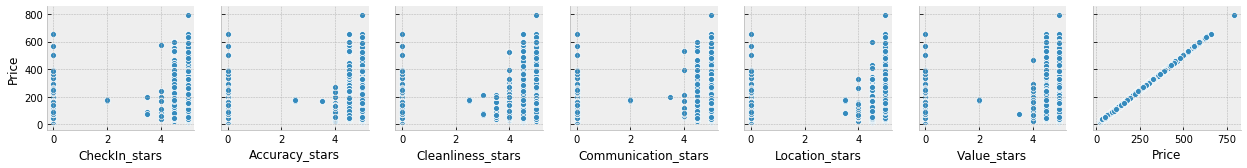

In [221]:
sns.pairplot(data= ReviewStarsNY,x_vars= ReviewStarsNY.columns,y_vars=['Price'])

### Bangkok

In [222]:
ReviewStarsBangkok_List = BangkokData.columns[11:17]
ReviewStarsBangkok_List

Index(['CheckIn_stars', 'Accuracy_stars', 'Cleanliness_stars',
       'Communication_stars', 'Location_stars', 'Value_stars'],
      dtype='object')

In [223]:
ReviewStarsBangkok = BangkokData[ReviewStarsBangkok_List]
ReviewStarsBangkok['Price'] = BangkokData['Price']
ReviewStarsBangkok.head()

,CheckIn_stars,Accuracy_stars,Cleanliness_stars,Communication_stars,Location_stars,Value_stars,Price
0,5.0,5.0,4.5,5.0,5.0,5.0,34.0
1,0.0,0.0,0.0,0.0,0.0,0.0,48.0
2,5.0,5.0,5.0,5.0,4.0,4.5,27.0
3,5.0,5.0,4.5,5.0,5.0,5.0,35.0
4,0.0,0.0,0.0,0.0,0.0,0.0,34.0


In [224]:
ReviewStarsBangkok.corr()['Price']


CheckIn_stars          0.053555
Accuracy_stars         0.053265
Cleanliness_stars      0.051520
Communication_stars    0.051650
Location_stars         0.086565
Value_stars            0.042335
Price                  1.000000
Name: Price, dtype: float64

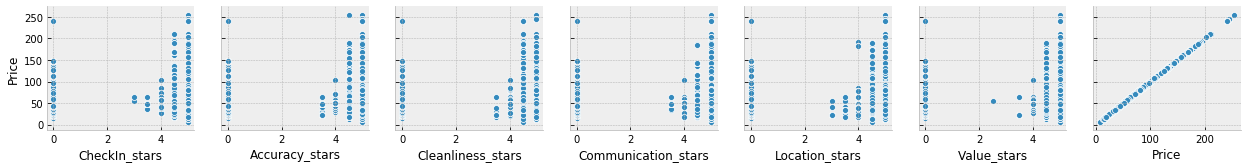

In [225]:
sns.pairplot(data= ReviewStarsBangkok,x_vars= ReviewStarsBangkok.columns,y_vars=['Price'])

### Cairo

In [226]:
ReviewStarsCairo_List = CairoData.columns[11:17]
ReviewStarsCairo_List

Index(['CheckIn_stars', 'Accuracy_stars', 'Cleanliness_stars',
       'Communication_stars', 'Location_stars', 'Value_stars'],
      dtype='object')

In [227]:
ReviewStarsCairo = CairoData[ReviewStarsCairo_List]
ReviewStarsCairo['Price'] = CairoData['Price']
ReviewStarsCairo.head()

,CheckIn_stars,Accuracy_stars,Cleanliness_stars,Communication_stars,Location_stars,Value_stars,Price
0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
1,0.0,0.0,0.0,0.0,0.0,0.0,12.0
2,5.0,4.0,3.5,5.0,4.5,4.0,22.0
3,5.0,5.0,5.0,5.0,5.0,5.0,19.0
4,0.0,0.0,0.0,0.0,0.0,0.0,23.0


In [228]:
ReviewStarsCairo.corr()['Price']

CheckIn_stars         -0.028501
Accuracy_stars        -0.025663
Cleanliness_stars     -0.012997
Communication_stars   -0.028073
Location_stars        -0.031733
Value_stars           -0.032676
Price                  1.000000
Name: Price, dtype: float64

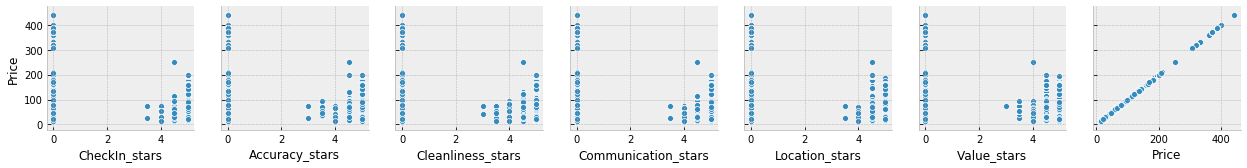

In [229]:
sns.pairplot(data= ReviewStarsCairo,x_vars= ReviewStarsCairo.columns,y_vars=['Price'])

### Rest of Features

In [250]:
# Shared_room has 3 levels
## Entire house/apartment = 0
## Shared room = 1
## Private room = 2

### NewYork

In [234]:
NY_rest = NewYorkData[['shared_room', 'shared_bathroom', 'Super_host']]
NY_rest['Price']= NewYorkData['Price']
NY_rest.head()

,shared_room,shared_bathroom,Super_host,Price
0,0,0,1,244.0
1,2,1,1,62.0
2,2,1,1,44.0
3,2,1,1,78.0
4,2,1,1,80.0


In [251]:
NY_rest.corr()['Price']

shared_room       -0.633473
shared_bathroom   -0.511981
Super_host         0.084713
Price              1.000000
Name: Price, dtype: float64

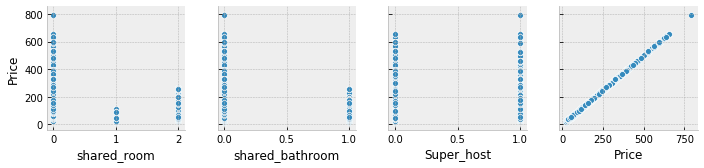

In [252]:
sns.pairplot(data= NY_rest,x_vars= NY_rest.columns,y_vars=['Price'])

### Bangkok

In [235]:
Bangkok_rest = BangkokData[['shared_room', 'shared_bathroom', 'Super_host']]
Bangkok_rest['Price']= BangkokData['Price']
Bangkok_rest.head()

,shared_room,shared_bathroom,Super_host,Price
0,0.0,0,1,34.0
1,0.0,0,0,48.0
2,0.0,0,1,27.0
3,0.0,0,0,35.0
4,0.0,0,1,34.0


In [253]:
Bangkok_rest.corr()['Price']

shared_room       -0.179574
shared_bathroom   -0.149778
Super_host         0.180583
Price              1.000000
Name: Price, dtype: float64

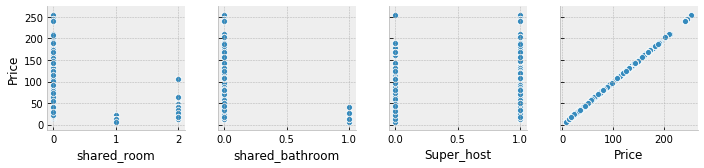

In [254]:
sns.pairplot(data= Bangkok_rest,x_vars= Bangkok_rest.columns,y_vars=['Price'])

### Cairo

In [236]:
Cairo_rest = CairoData[['shared_room', 'shared_bathroom', 'Super_host']]
Cairo_rest['Price']= CairoData['Price']
Cairo_rest.head()

,shared_room,shared_bathroom,Super_host,Price
0,2,1,0,15.0
1,0,0,0,12.0
2,2,1,0,22.0
3,2,0,0,19.0
4,2,1,0,23.0


In [255]:
Cairo_rest.corr()['Price']

shared_room       -0.415663
shared_bathroom   -0.326417
Super_host         0.016063
Price              1.000000
Name: Price, dtype: float64

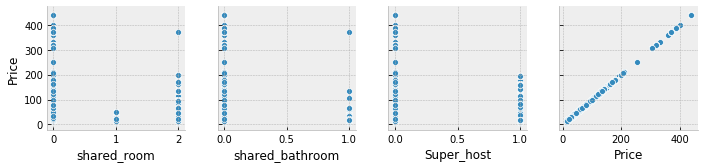

In [256]:
sns.pairplot(data= Cairo_rest,x_vars= Cairo_rest.columns,y_vars=['Price'])